In [1]:
# import libraries/dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
# visualize the data loaded


[7]


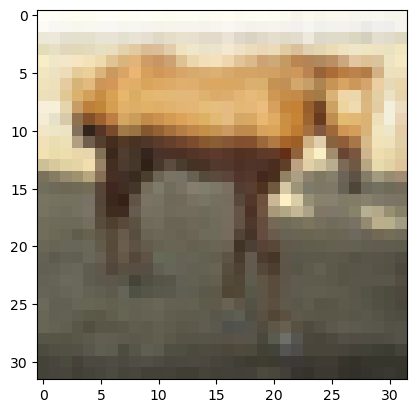

In [8]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\singh\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


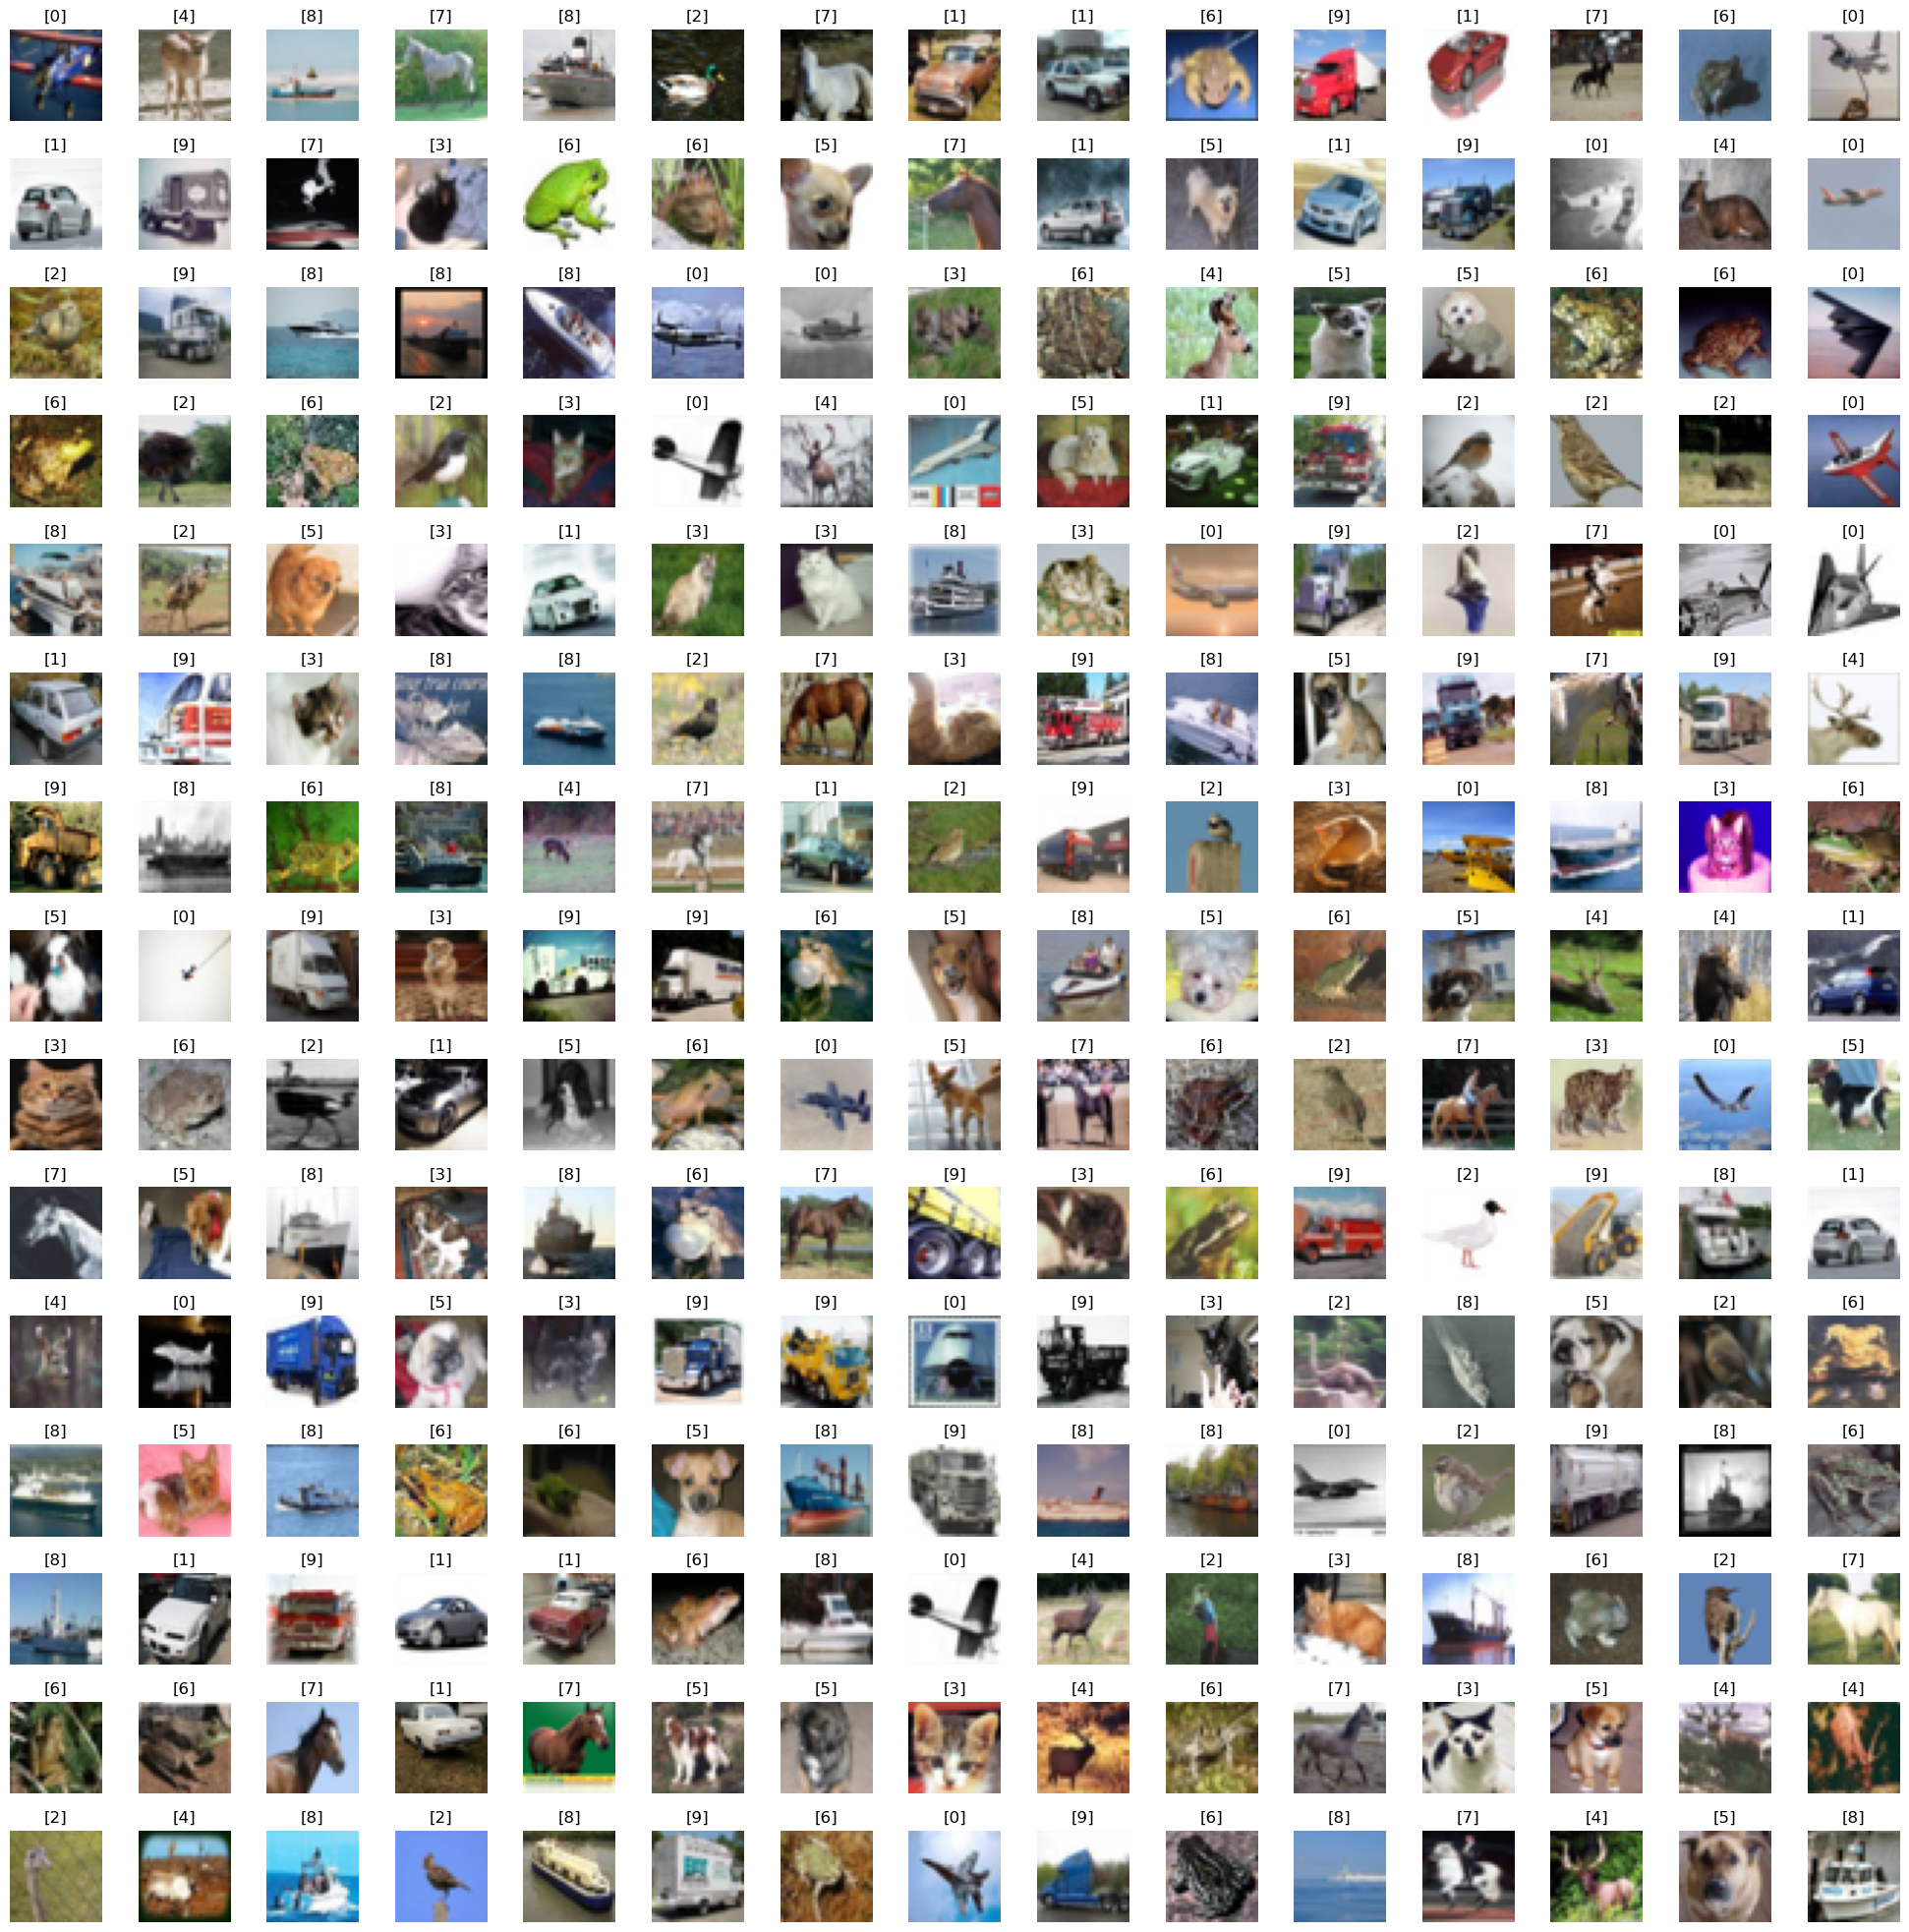

In [9]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid* W_grid):
    index = np.random.randint(0, n_training) #pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)    

In [10]:
# Preparing the data for model training
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [12]:
number_cat = 10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
# one-hot encoding is common step when dealing with multi-class classification problems in deep learning
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)

In [15]:
# the above snippet of code changes the value in y_train to binary or one-hot encoding
# so that we know which neuron is firing at a given moment
# for example 1 will be encoded as [0, 1, 0, 0, 0, 0, 0, 0 ,0]
# 0 will be encoded as [1, 0, 0, 0, 0, 0, 0, 0, 0]
# basically in an array of length 10 as we have 10 categorical classes and each each array has 1 in the index(0-indexed) of the class number
y_train[49997]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
# normalize data - X_train and X_test contain values from 0 to 255, normalize them such that the values are now between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape = X_train.shape[1:]

In [21]:
Input_shape

(32, 32, 3)

In [22]:
X_test.shape


(10000, 32, 32, 3)

In [23]:
#Train model

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

#flattening
cnn_model.add(Flatten())

#add the fully connected CNN model network
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

#output layer
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [26]:
cnn_model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [27]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 [==============================] - 97s 61ms/step - loss: 1.6128 - accuracy: 0.4124


In [47]:
# Evaluate the model
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [29]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 12ms/step - loss: 1.2274 - accuracy: 0.5665
Test Accuracy: 0.5665000081062317


In [30]:
predictions = cnn_model.predict(X_test)
predicted_classes = predictions.argmax(axis=-1)
predicted_classes

313/313 [==============================] - 4s 12ms/step


array([3, 1, 1, ..., 5, 1, 7], dtype=int64)

In [31]:
y_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [32]:
y_test = y_test.argmax(1)

In [33]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

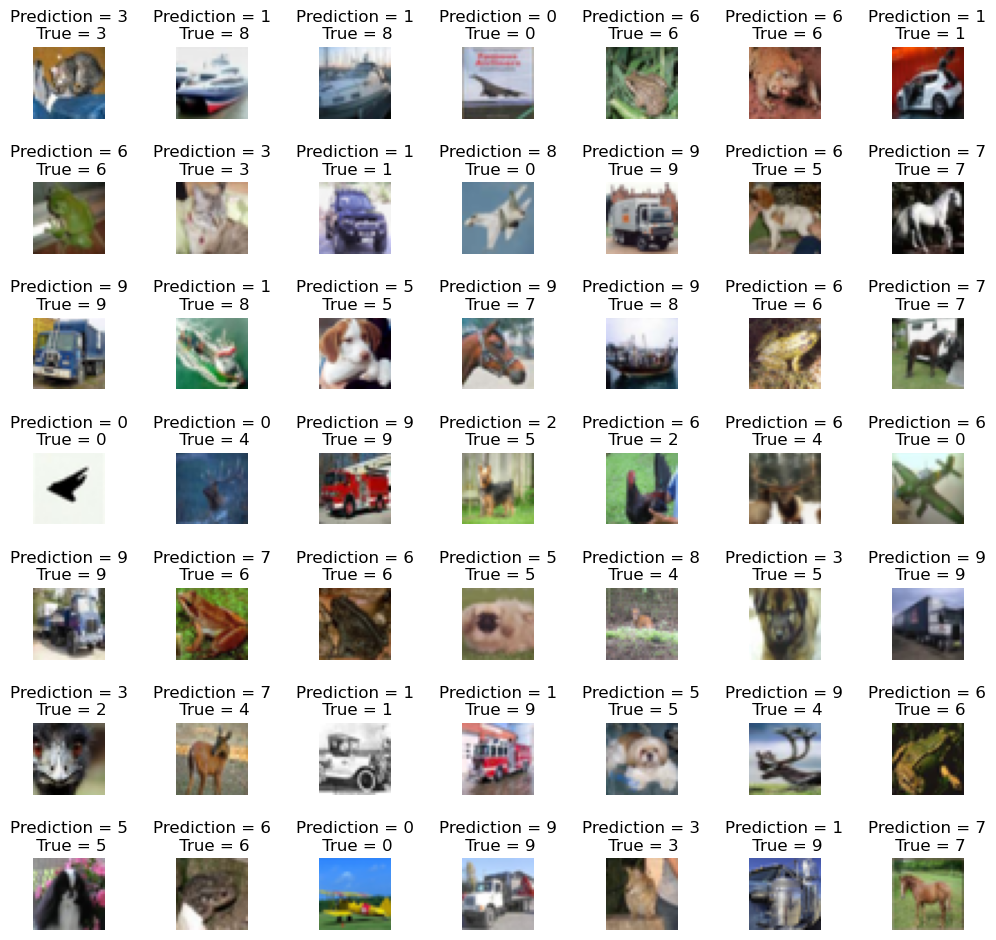

In [34]:
L = 7
W = 7
fig, axes = plt.subplots(L,W, figsize = (12, 12))
axes = axes.ravel()

for  i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

<AxesSubplot:>

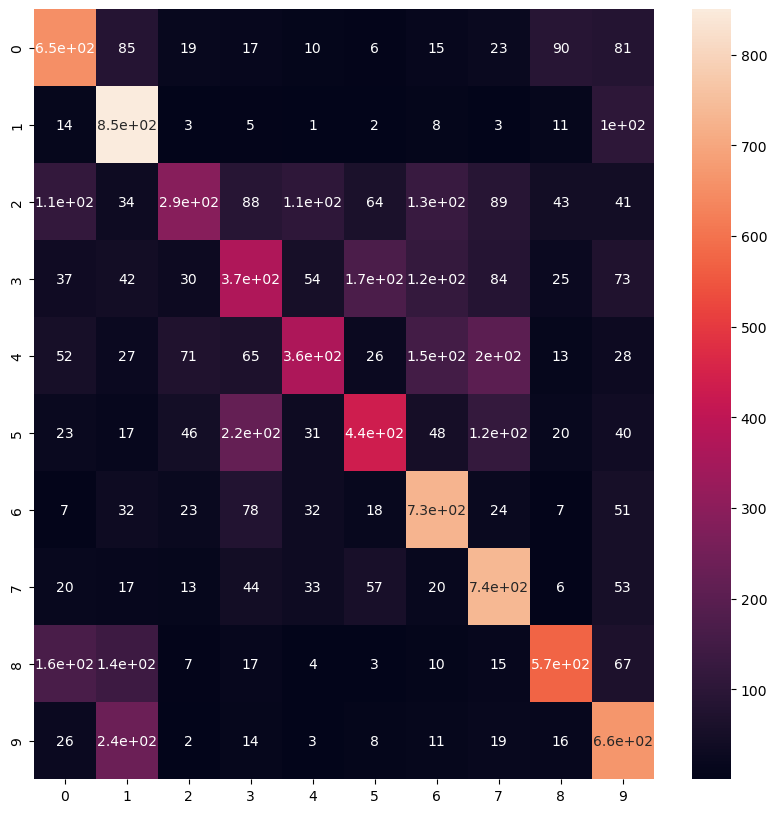

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [36]:
# saving the model
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# data augmentation for cifar-10 dataset
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 8
X_train_sample = X_train[:n]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range = 90)
datagen_train.fit(X_train_sample)

In [ ]:
from PIL import Image

fig = plt.figure(figsize=(20, 2))
for x_batch in datagen_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break

In [38]:
# training model using the new augmented dataset
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                            )

In [39]:
datagen.fit(X_train)

In [40]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs = 2)

Epoch 1/2


C:\Users\singh\AppData\Local\Temp\ipykernel_17464\1991337140.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs = 2)


1563/1563 [==============================] - 102s 65ms/step - loss: 1.7020 - accuracy: 0.3851
Epoch 2/2
1563/1563 [==============================] - 104s 66ms/step - loss: 1.5629 - accuracy: 0.4405


ValueError: in user code:

    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\singh\anaconda3\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
